# Project - Modeling Complex Genomic Associations


### Import Necessary Python Packages

In [3]:
!pip install tpot

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

### Load 'data.csv' (the 'X' part of the dataset)

In [3]:
# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('C:\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Data\TCGA-PANCAN-HiSeq-801x20531\data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()

First few rows of the DataFrame:


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


### Load 'labels.csv' (the 'y' part of the dataset)

In [4]:
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('C:\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Data\TCGA-PANCAN-HiSeq-801x20531\labels.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_y.head()

First few rows of the DataFrame:


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
df = pd.merge(df_x, df_y)
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [6]:
df.shape

(801, 20533)

#### Drop the instance label column

In [7]:
df = df.drop(df.columns[0], axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


## Basic Exploratory Analysis

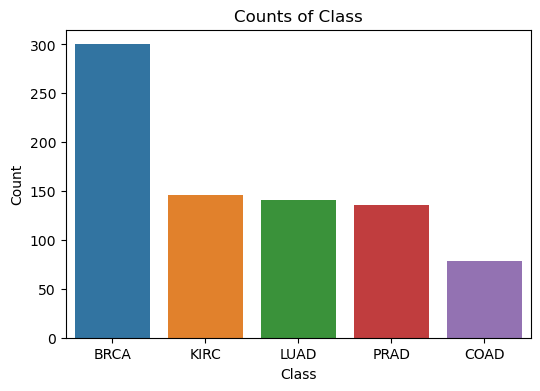

In [8]:
# Choose the column for which you want to plot the counts
column_name = 'Class'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()

# Plot the value counts using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Missing Value Assessment

# Group the DataFrame by the "class" column
grouped_df = df.groupby('Class')

# Calculate the sum of missing values in rows within each group
missing_values_per_class = grouped_df.apply(lambda x: x.isnull().sum().sum())

# Now 'missing_values_per_class' contains the sum of missing values for each class
print("Sum of missing values for each class:")
print(missing_values_per_class)

# Count missing values in dataset
total_missing_values = df.isna().sum().sum()

# Now 'total_missing_values' contains the total number of missing values in the DataFrame
print("Total number of missing values:", total_missing_values)

Sum of missing values for each class:
Class
BRCA    0
COAD    0
KIRC    0
LUAD    0
PRAD    0
dtype: int64
Total number of missing values: 0


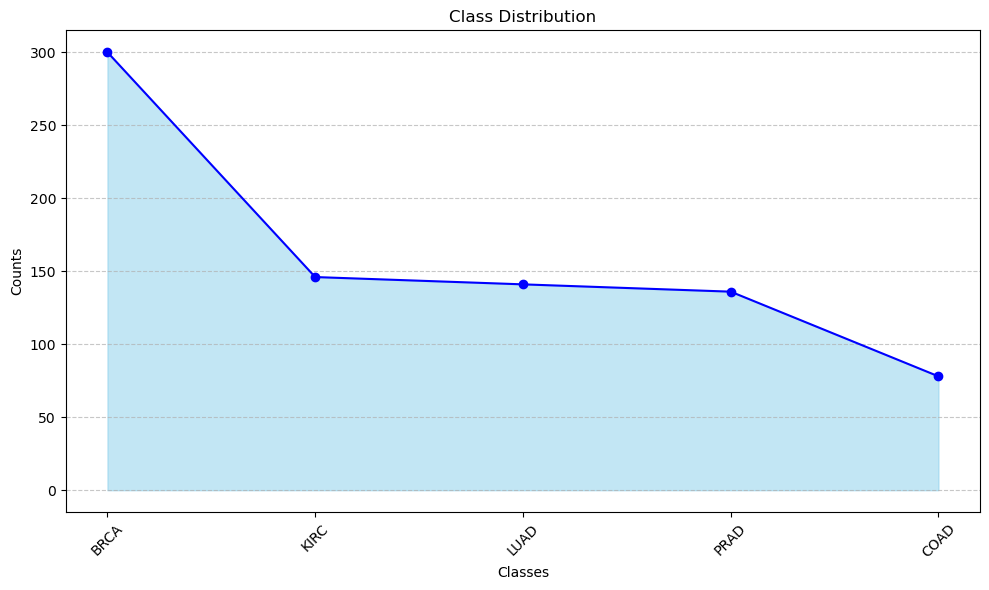

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with 'Class' column
# Load the data or use your existing 'labels' DataFrame
# labels = pd.read_csv('path_to_labels_data.csv')

# Calculate class counts
class_counts = df['Class'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.fill_between(class_counts.index, class_counts.values, color='skyblue', alpha=0.5)
plt.plot(class_counts.index, class_counts.values, marker='o', color='blue')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


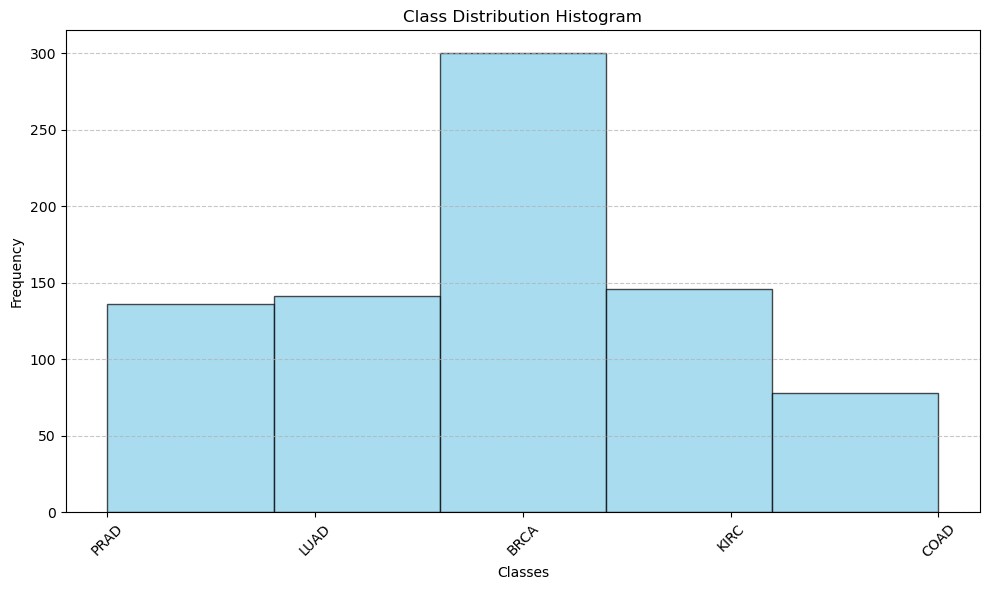

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with 'Class' column
# Load the data or use your existing 'labels' DataFrame
# labels = pd.read_csv('path_to_labels_data.csv')

# Calculate class counts
class_counts = df['Class'].value_counts()

# Plotting the histogram for class distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Class'], bins=len(class_counts), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution Histogram')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


First few rows of the DataFrame:


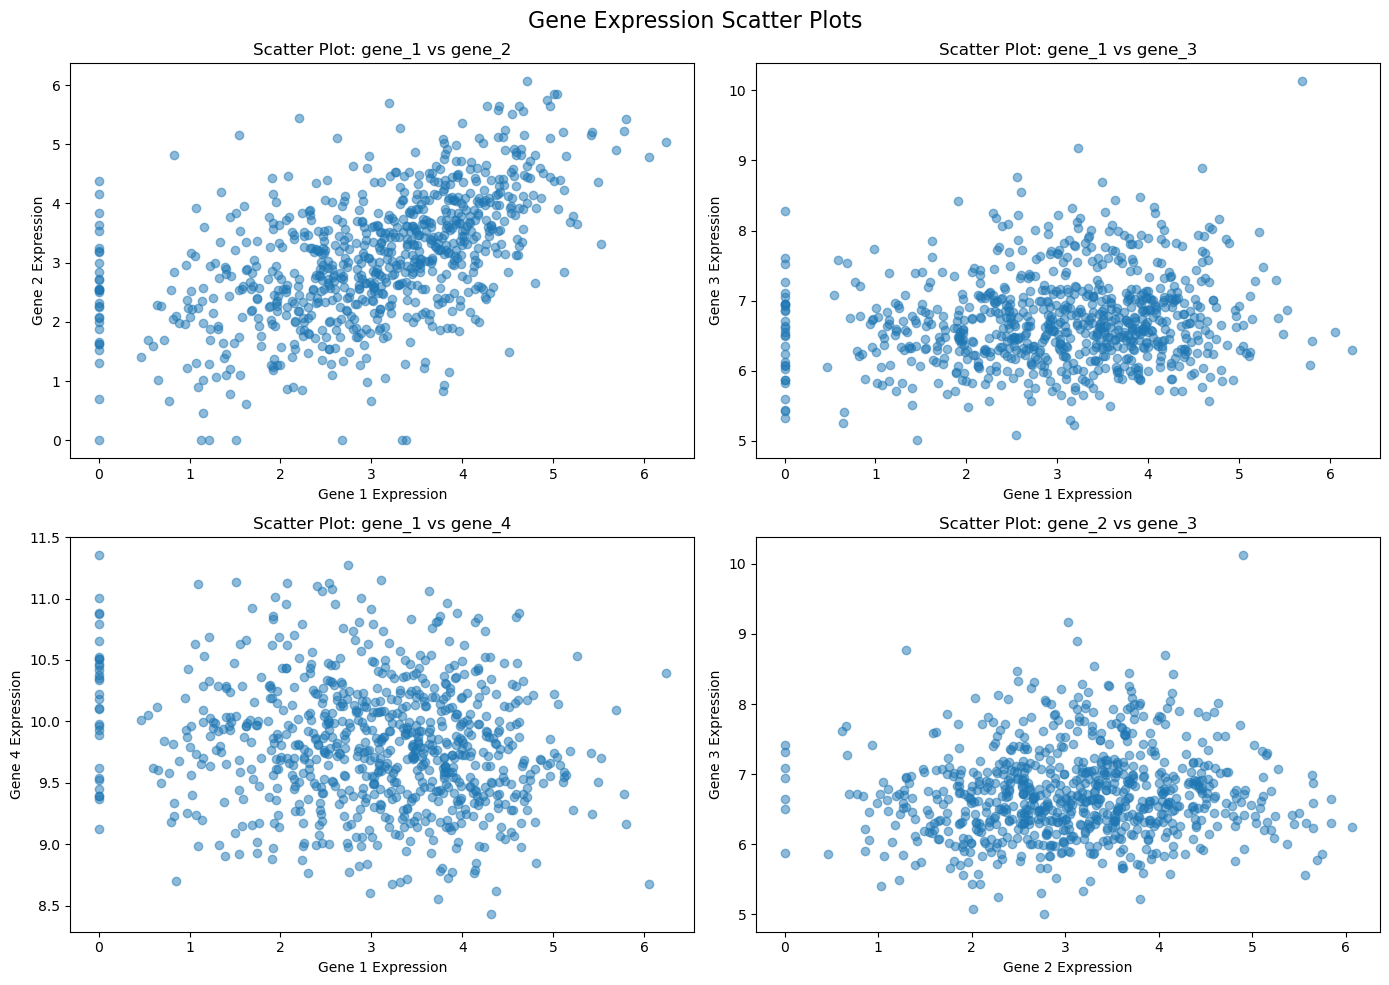

In [12]:

# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('C:\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Data\TCGA-PANCAN-HiSeq-801x20531\data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('C:\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\Data\TCGA-PANCAN-HiSeq-801x20531\labels.csv')


# Assuming 'df' is a DataFrame containing gene expression data

# Set up the figure with 4 subplots in a 2x2 grid
plt.figure(figsize=(14, 10))
plt.suptitle('Gene Expression Scatter Plots', fontsize=16)

# Subplot 1 for gene_1 vs gene_2
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, position 1
plt.scatter(df['gene_1'], df['gene_2'], alpha=0.5)
plt.title('Scatter Plot: gene_1 vs gene_2')
plt.xlabel('Gene 1 Expression')
plt.ylabel('Gene 2 Expression')

# Subplot 2 for gene_1 vs gene_3
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, position 2
plt.scatter(df['gene_1'], df['gene_3'], alpha=0.5)
plt.title('Scatter Plot: gene_1 vs gene_3')
plt.xlabel('Gene 1 Expression')
plt.ylabel('Gene 3 Expression')

# Subplot 3 for gene_1 vs gene_4
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, position 3
plt.scatter(df['gene_1'], df['gene_4'], alpha=0.5)
plt.title('Scatter Plot: gene_1 vs gene_4')
plt.xlabel('Gene 1 Expression')
plt.ylabel('Gene 4 Expression')

# Subplot 4 for gene_2 vs gene_3
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, position 4
plt.scatter(df['gene_2'], df['gene_3'], alpha=0.5)
plt.title('Scatter Plot: gene_2 vs gene_3')
plt.xlabel('Gene 2 Expression')
plt.ylabel('Gene 3 Expression')

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Display the figure
plt.show()


In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply SelectKBest feature selection
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['gene_219', 'gene_220', 'gene_9175', 'gene_9176', 'gene_12069',
       'gene_15895', 'gene_15896', 'gene_15898', 'gene_15899', 'gene_18135'],
      dtype='object')


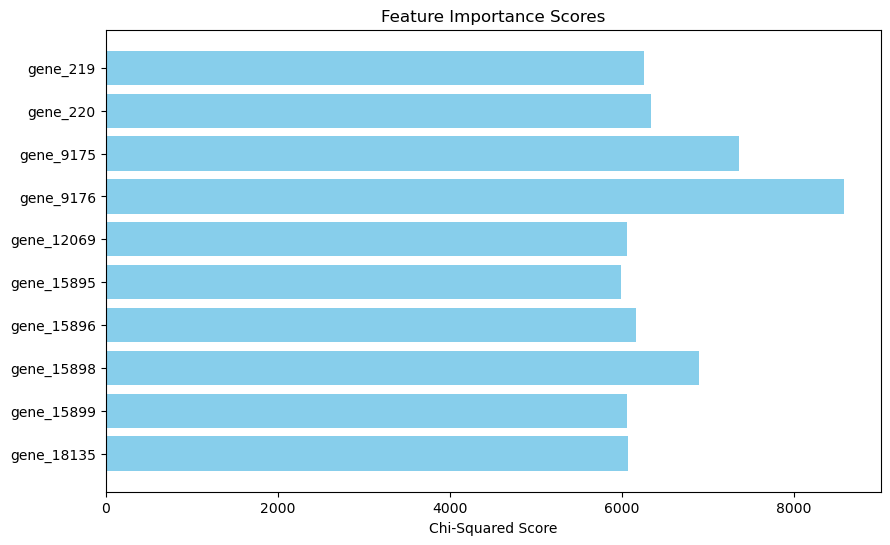

In [14]:
import matplotlib.pyplot as plt

# Get the feature scores from SelectKBest
feature_scores = selector.scores_

# Create a bar plot to visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_scores[selected_indices], color='skyblue')
plt.xlabel('Chi-Squared Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

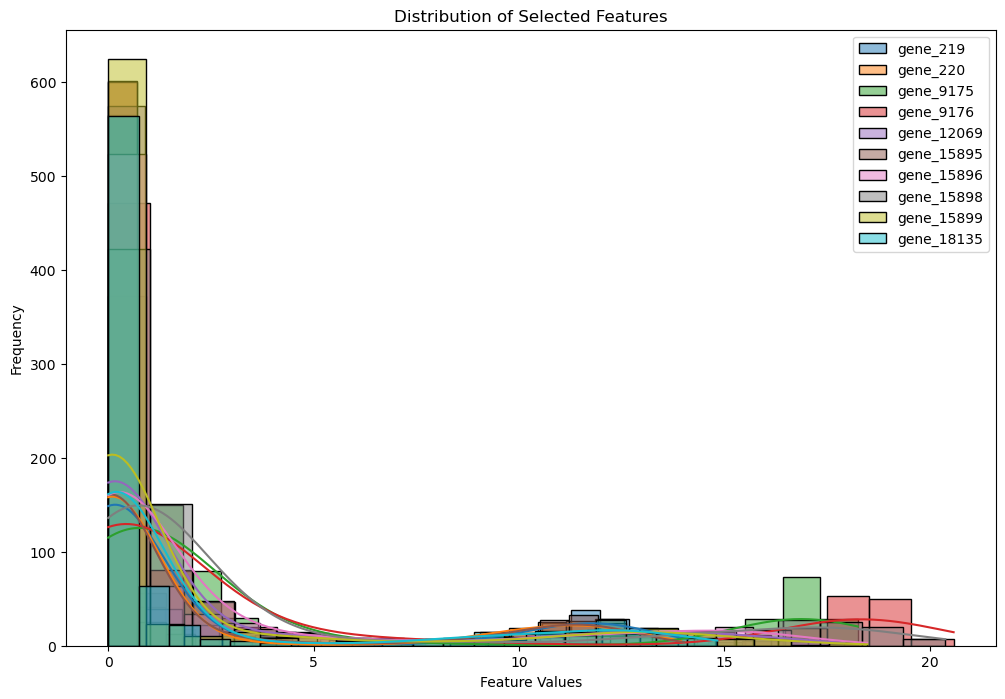

In [15]:
# Plot histograms for selected features
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.histplot(df[feature], bins=20, kde=True, label=feature, alpha=0.5)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Distribution of Selected Features')
plt.legend()
plt.show()


C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aagau\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

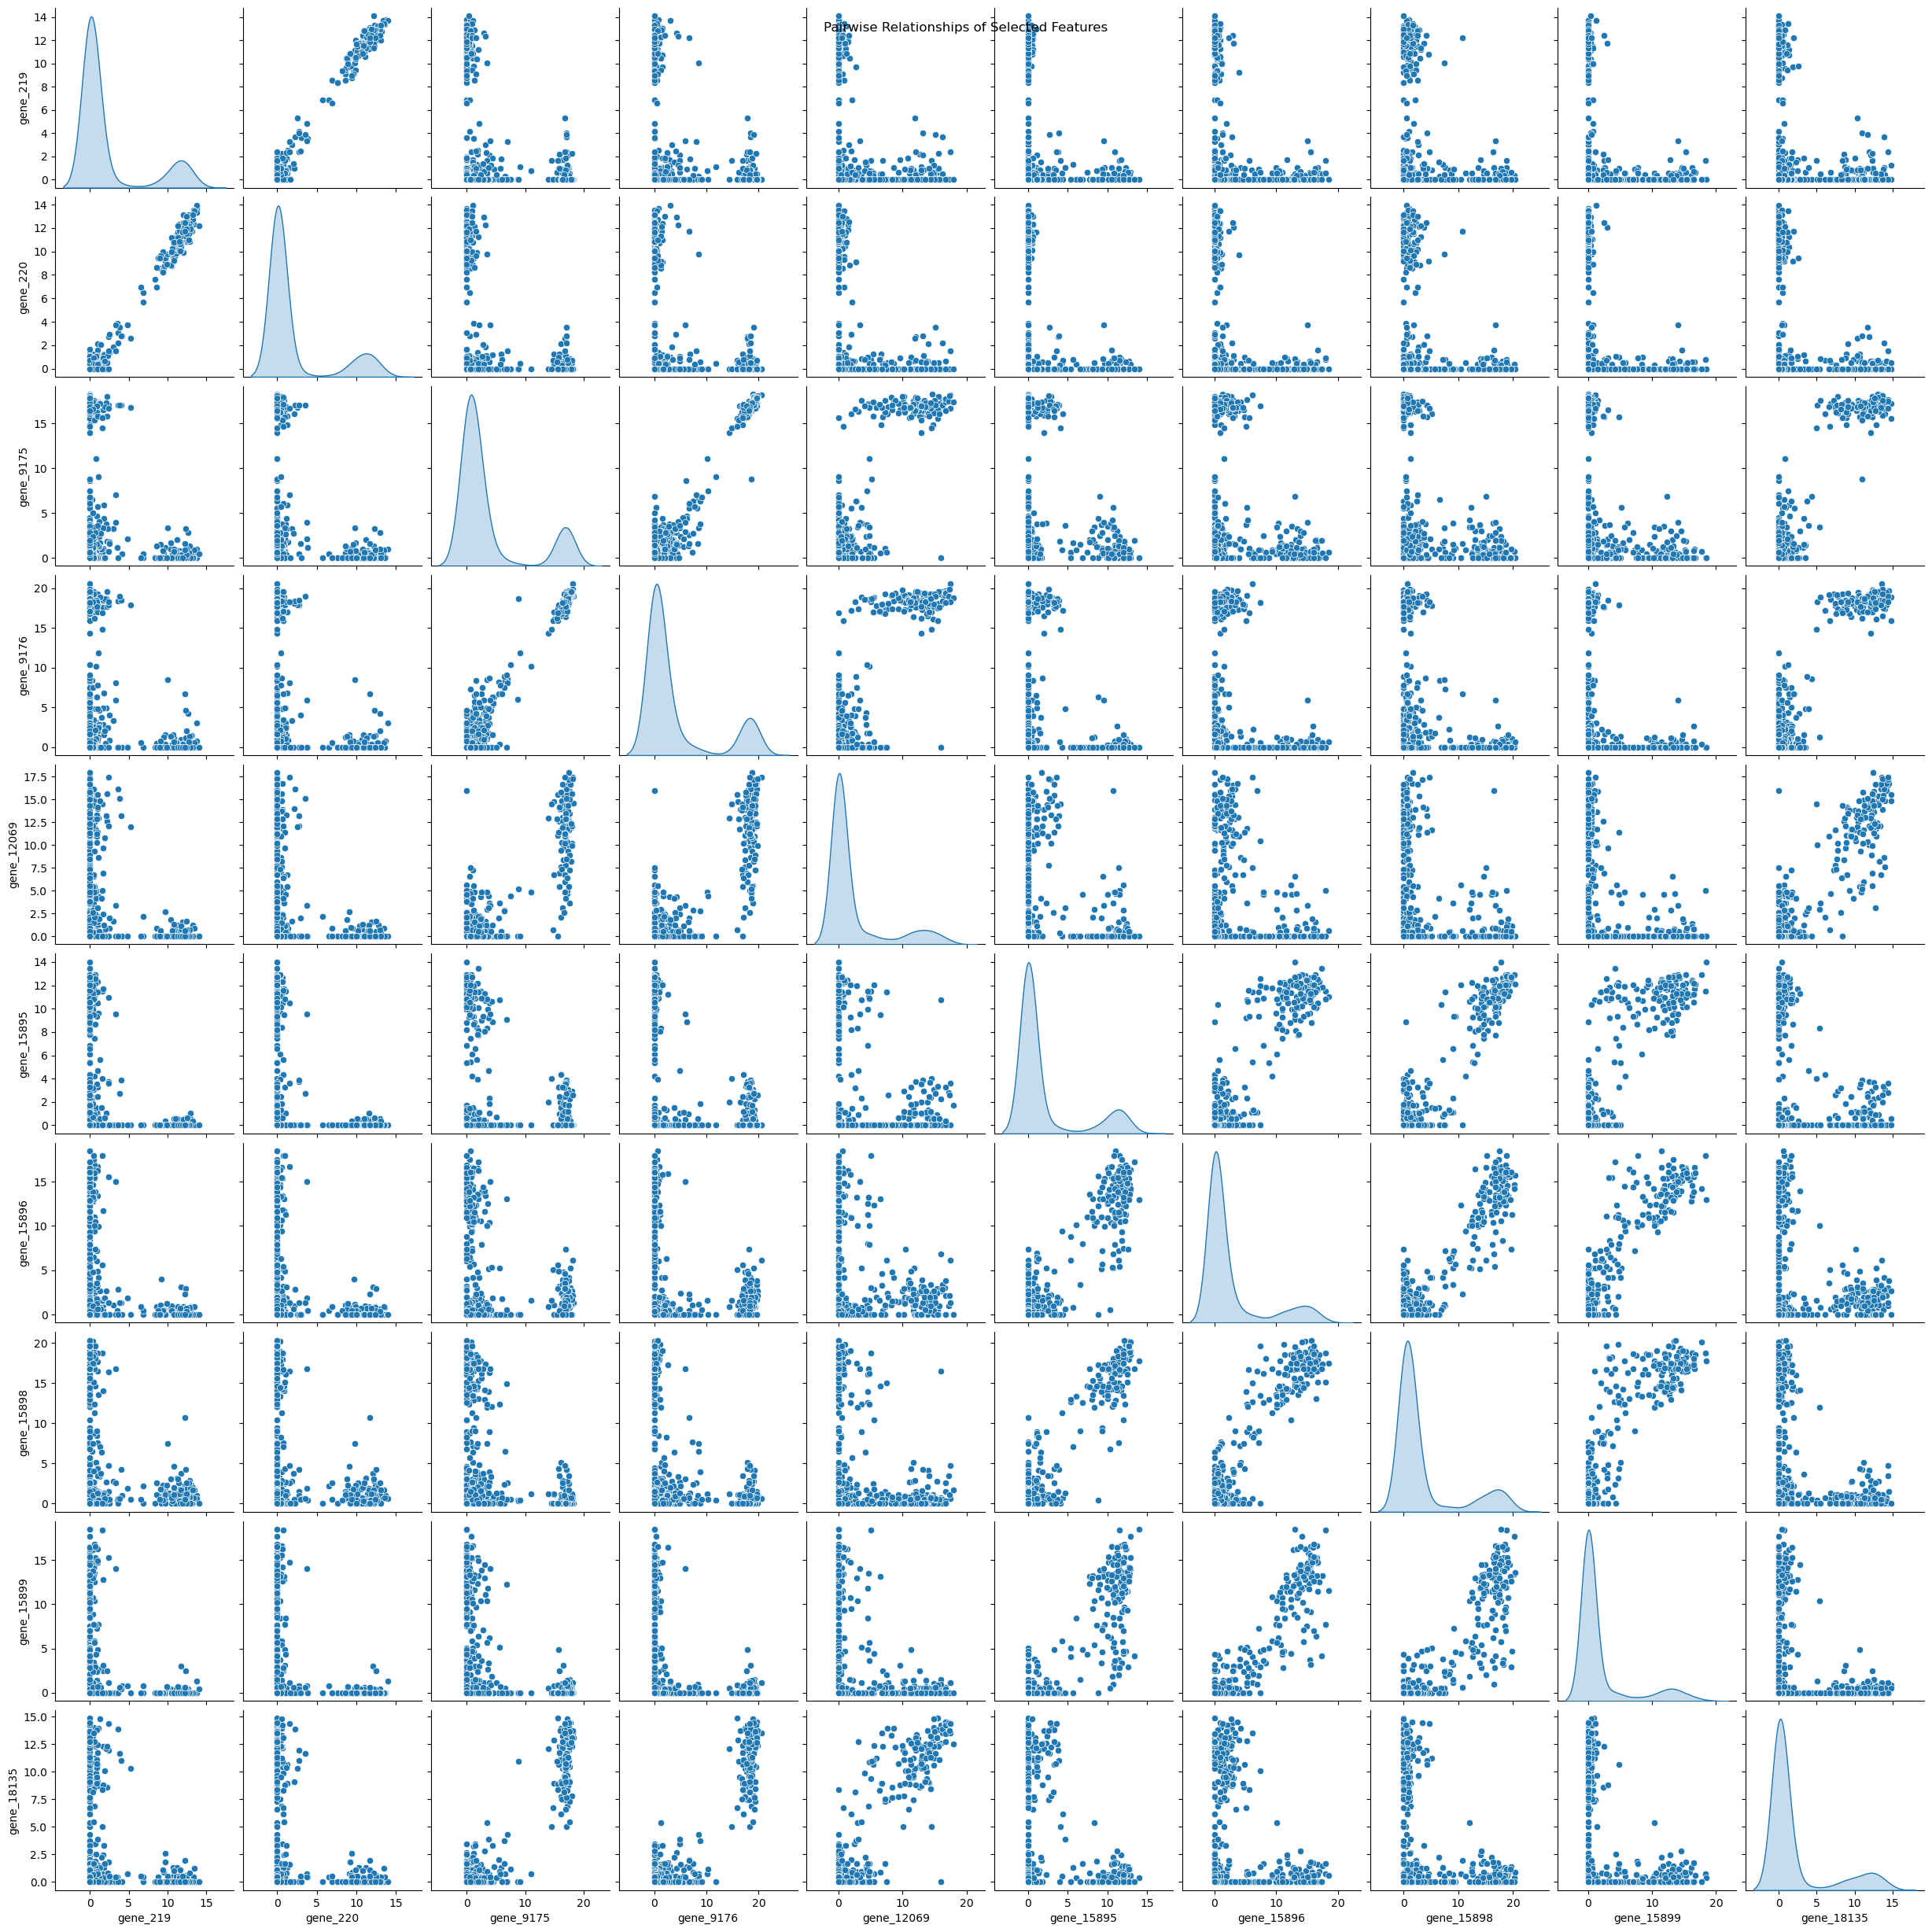

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships for selected features
pairplot = sns.pairplot(df[selected_features], diag_kind='kde', markers='o')
plt.suptitle('Pairwise Relationships of Selected Features')

# Save the pairplot as an image to the specified location
pairplot.savefig('C:\\Project - Cancer Subtype Multi-Class Classification in Gene Expression Data\\pairwise_relationships.png')

# Display the pairplot
plt.show()


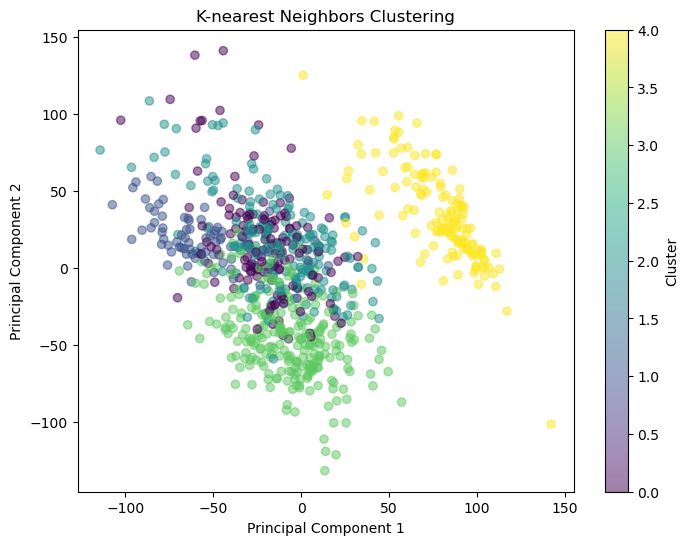

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Apply K-nearest neighbors for clustering
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, clusters)  # Assuming 'clusters' is the result of KMeans clustering

# Predict cluster labels for all data points
clusters_knn = knn.predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_knn, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-nearest Neighbors Clustering')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\aagau\AppData\Local\Temp\ipykernel_3292\3833156848.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', marker='o', alpha=0.5)


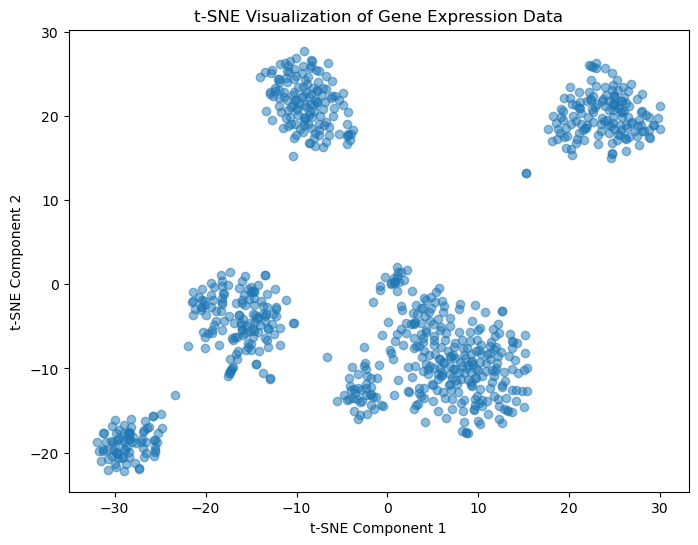

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming X_scaled is your standardized gene expression data
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE embeddings
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Gene Expression Data')
plt.show()


### Train and Evaluate Decision Tree Models (with 3-fold CV)

In [15]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV


def train_model(model, param_grid=None, use_tpot=False):
    if use_tpot:
        # Initialize TPOTClassifier for AutoML
        tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
        
        # Fit TPOT on the data
        tpot.fit(X, y)
        
        # Get the best model from TPOT
        model = tpot.fitted_pipeline_
    else:
        # Split data into features and target
        X = df.drop(columns=['Class'])
        y = df['Class']

        # Initialize evaluation metrics lists
        accuracies = []
        balanced_accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        # Initialize KFold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=42)

        if param_grid:
            # Initialize GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

            # Perform hyperparameter tuning
            grid_search.fit(X, y)

            # Get the best model from GridSearchCV
            model = grid_search.best_estimator_

        # Iterate over each fold of cross-validation
        for train_index, test_index in kf.split(X):
            # Split data into train and test sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)

            # Predict on the testing data
            y_pred = model.predict(X_test)

            # Calculate evaluation metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='weighted'))
            recalls.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Calculate average evaluation metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1 = sum(f1_scores) / len(f1_scores)

        # Print summary of model performance
        print("Average Accuracy:", avg_accuracy)
        print("Average Balanced Accuracy:", avg_balanced_accuracy)
        print("Average Precision:", avg_precision)
        print("Average Recall:", avg_recall)
        print("Average F1 Score:", avg_f1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Solvers for optimization
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}


In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train and evaluate the model with hyperparameter tuning
train_model(log_reg_model, param_grid)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Average Accuracy: 0.99875
Average Balanced Accuracy: 0.9985294117647059
Average Precision: 0.9987666666666667
Average Recall: 0.99875
Average F1 Score: 0.9987448662726635


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

def train_model_log_reg(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train and evaluate the Logistic Regression model
train_model_log_reg(log_reg_model)

Average Accuracy: 0.9975031210986267
Average Balanced Accuracy: 0.9961025641025641
Average Precision: 0.9975159916084276
Average Recall: 0.9975031210986267
Average F1 Score: 0.997494115795264


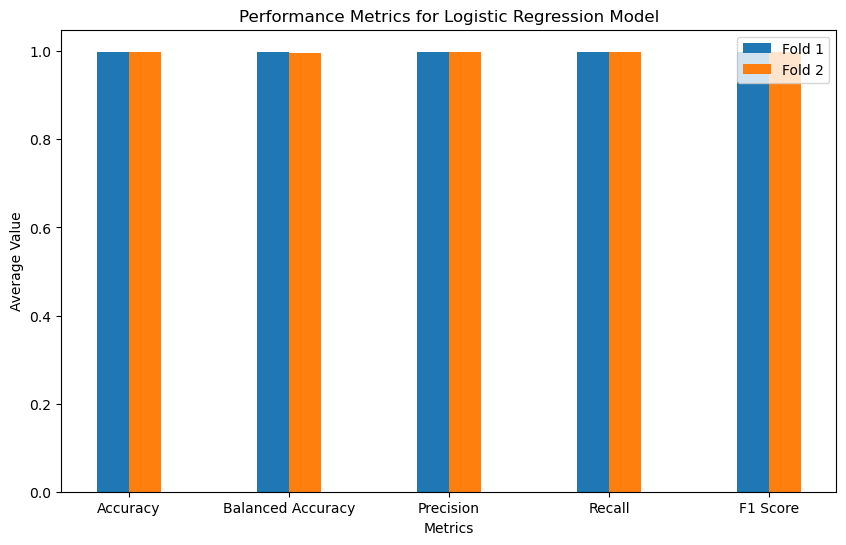

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics and their corresponding average values
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
avg_values_fold1 = [0.99875, 0.9985294117647059, 0.9987666666666667, 0.99875, 0.9987448662726635]
avg_values_fold2 = [0.9975031210986267, 0.9961025641025641, 0.9975159916084276, 0.9975031210986267, 0.997494115795264]

# Define the number of metrics
num_metrics = len(metrics)

# Set the positions for the bars with spacing between metrics
spacing = 0.4
positions_fold1 = np.arange(num_metrics) * 2
positions_fold2 = positions_fold1 + spacing  # Add spacing between metrics

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create bar plots for each fold
plt.bar(positions_fold1, avg_values_fold1, width=0.4, label='Fold 1')
plt.bar(positions_fold2, avg_values_fold2, width=0.4, label='Fold 2')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Performance Metrics for Logistic Regression Model')
plt.xticks(positions_fold1 + spacing / 2, metrics)  # Set x-axis ticks with spacing between metrics

# Add legend
plt.legend()

# Show plot
plt.show()


In [29]:
from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

def train_model(model, param_grid=None, use_tpot=False):
    if use_tpot:
        # Initialize TPOTClassifier for AutoML
        tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
        
        # Fit TPOT on the data
        tpot.fit(X, y)
        
        # Get the best model from TPOT
        model = tpot.fitted_pipeline_
    else:
        # Split data into features and target
        X = df.drop(columns=['Class'])
        y = df['Class']

        # Initialize evaluation metrics lists
        accuracies = []
        balanced_accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        # Initialize KFold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=42)

        if param_grid:
            # Initialize GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

            # Perform hyperparameter tuning
            grid_search.fit(X, y)

            # Get the best model from GridSearchCV
            model = grid_search.best_estimator_

        # Iterate over each fold of cross-validation
        for train_index, test_index in kf.split(X):
            # Split data into train and test sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)

            # Predict on the testing data
            y_pred = model.predict(X_test)

            # Calculate evaluation metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='weighted'))
            recalls.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Calculate average evaluation metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1 = sum(f1_scores) / len(f1_scores)

        # Print summary of model performance
        print("Average Accuracy:", avg_accuracy)
        print("Average Balanced Accuracy:", avg_balanced_accuracy)
        print("Average Precision:", avg_precision)
        print("Average Recall:", avg_recall)
        print("Average F1 Score:", avg_f1)

# Define the parameter grid for hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train and evaluate the model with hyperparameter tuning
train_model(dt_model, param_grid_dt)


Fitting 4 folds for each of 54 candidates, totalling 216 fits
Average Accuracy: 0.9712935323383084
Average Balanced Accuracy: 0.9669139664427042
Average Precision: 0.9716714286502649
Average Recall: 0.9712935323383084
Average F1 Score: 0.9712898100606501


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

def train_model_decision_tree(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)

# Initialize Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# Train and evaluate the Decision Tree Classifier model
train_model_decision_tree(dt_model)


Average Accuracy: 0.9600499375780275
Average Balanced Accuracy: 0.9557229991369541
Average Precision: 0.9605302538999698
Average Recall: 0.9600499375780275
Average F1 Score: 0.9600961958948261


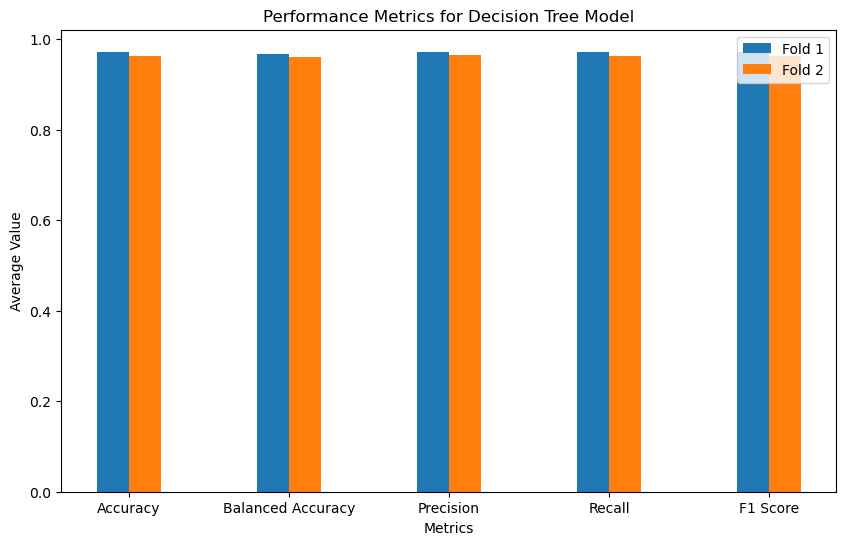

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics and their corresponding average values
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
avg_values_fold1 = [0.971, 0.967, 0.972, 0.971, 0.971]
avg_values_fold2 = [0.963, 0.961, 0.965, 0.963, 0.963]

# Define the number of metrics
num_metrics = len(metrics)

# Set the positions for the bars with spacing between metrics
spacing = 0.4
positions_fold1 = np.arange(num_metrics) * 2
positions_fold2 = positions_fold1 + spacing  # Add spacing between metrics

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create bar plots for each fold
plt.bar(positions_fold1, avg_values_fold1, width=0.4, label='Fold 1')
plt.bar(positions_fold2, avg_values_fold2, width=0.4, label='Fold 2')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Performance Metrics for Decision Tree Model')
plt.xticks(positions_fold1 + spacing / 2, metrics)  # Set x-axis ticks with spacing between metrics

# Add legend
plt.legend()

# Show plot
plt.show()


In [31]:
from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

def train_model(model, param_grid=None, use_tpot=False):
    if use_tpot:
        # Initialize TPOTClassifier for AutoML
        tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
        
        # Fit TPOT on the data
        tpot.fit(X, y)
        
        # Get the best model from TPOT
        model = tpot.fitted_pipeline_
    else:
        # Split data into features and target
        X = df.drop(columns=['Class'])
        y = df['Class']

        # Initialize evaluation metrics lists
        accuracies = []
        balanced_accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        # Initialize KFold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=42)

        if param_grid:
            # Initialize GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

            # Perform hyperparameter tuning
            grid_search.fit(X, y)

            # Get the best model from GridSearchCV
            model = grid_search.best_estimator_

        # Iterate over each fold of cross-validation
        for train_index, test_index in kf.split(X):
            # Split data into train and test sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)

            # Predict on the testing data
            y_pred = model.predict(X_test)

            # Calculate evaluation metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='weighted'))
            recalls.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Calculate average evaluation metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1 = sum(f1_scores) / len(f1_scores)

        # Print summary of model performance
        print("Average Accuracy:", avg_accuracy)
        print("Average Balanced Accuracy:", avg_balanced_accuracy)
        print("Average Precision:", avg_precision)
        print("Average Recall:", avg_recall)
        print("Average F1 Score:", avg_f1)

# Define the parameter grid for hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Train and evaluate the model with hyperparameter tuning
train_model(rf_model, param_grid_rf)


Fitting 4 folds for each of 81 candidates, totalling 324 fits
Average Accuracy: 0.9975
Average Balanced Accuracy: 0.9973930481283423
Average Precision: 0.9975342723004695
Average Recall: 0.9975
Average F1 Score: 0.997492114988731


In [24]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model)

Average Accuracy: 0.9962500000000001
Average Balanced Accuracy: 0.9962566844919787
Average Precision: 0.9963273757487453
Average Recall: 0.9962500000000001
Average F1 Score: 0.9962458959929656


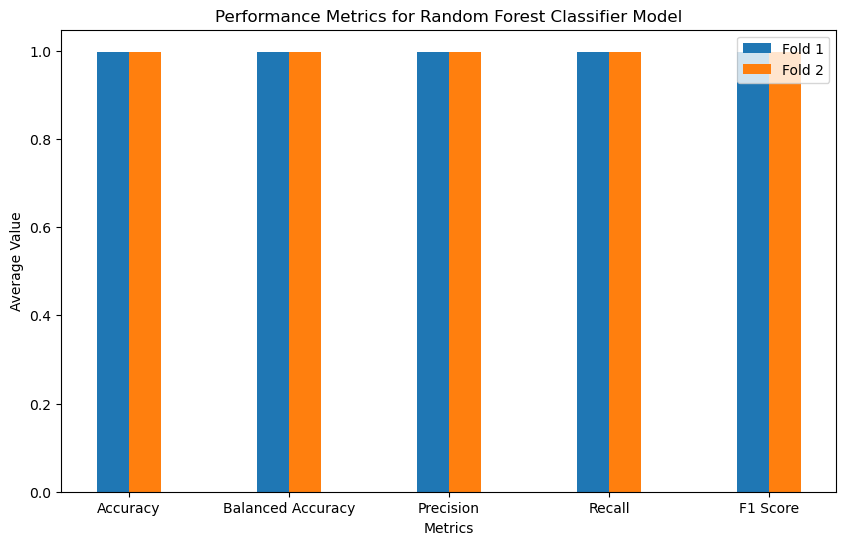

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics and their corresponding average values for Random Forest
metrics_rf = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
avg_values_fold1_rf = [0.9975, 0.9973930481283423, 0.9975342723004695, 0.9975, 0.997492114988731]
avg_values_fold2_rf = [0.9962500000000001, 0.9962566844919787, 0.9963273757487453, 0.9962500000000001, 0.9962458959929656]

# Define the number of metrics for Random Forest
num_metrics_rf = len(metrics_rf)

# Set the positions for the bars with spacing between metrics for Random Forest
spacing_rf = 0.4
positions_fold1_rf = np.arange(num_metrics_rf) * 2
positions_fold2_rf = positions_fold1_rf + spacing_rf  # Add spacing between metrics

# Increase the figure size for Random Forest
plt.figure(figsize=(10, 6))

# Create bar plots for each fold for Random Forest
plt.bar(positions_fold1_rf, avg_values_fold1_rf, width=0.4, label='Fold 1')
plt.bar(positions_fold2_rf, avg_values_fold2_rf, width=0.4, label='Fold 2')

# Add labels and title for Random Forest
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Performance Metrics for Random Forest Classifier Model')
plt.xticks(positions_fold1_rf + spacing_rf / 2, metrics_rf)  # Set x-axis ticks with spacing between metrics for Random Forest

# Add legend for Random Forest
plt.legend()

# Show plot for Random Forest
plt.show()


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier

def train_model(model, param_grid=None, use_tpot=False):
    if use_tpot:
        # Initialize TPOTClassifier for AutoML
        tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
        
        # Fit TPOT on the data
        tpot.fit(X, y)
        
        # Get the best model from TPOT
        model = tpot.fitted_pipeline_
    else:
        # Split data into features and target
        X = df.drop(columns=['Class'])
        y = df['Class']

        # Initialize evaluation metrics lists
        accuracies = []
        balanced_accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        # Initialize KFold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=42)

        if param_grid:
            # Initialize GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

            # Perform hyperparameter tuning
            grid_search.fit(X, y)

            # Get the best model from GridSearchCV
            model = grid_search.best_estimator_

        # Iterate over each fold of cross-validation
        for train_index, test_index in kf.split(X):
            # Split data into train and test sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)

            # Predict on the testing data
            y_pred = model.predict(X_test)

            # Calculate evaluation metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='weighted'))
            recalls.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Calculate average evaluation metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1 = sum(f1_scores) / len(f1_scores)

        # Print summary of model performance
        print("Average Accuracy:", avg_accuracy)
        print("Average Balanced Accuracy:", avg_balanced_accuracy)
        print("Average Precision:", avg_precision)
        print("Average Recall:", avg_recall)
        print("Average F1 Score:", avg_f1)

# Define the parameter grid for hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train and evaluate the model with hyperparameter tuning
train_model(gb_model, param_grid_gb)


Fitting 4 folds for each of 243 candidates, totalling 972 fits


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import pandas as pd


def train_model(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)



In [25]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train and evaluate the model with hyperparameter tuning
train_model(gb_model)

Average Accuracy: 0.9912609238451934
Average Balanced Accuracy: 0.9889799059906522
Average Precision: 0.9914386185025563
Average Recall: 0.9912609238451934
Average F1 Score: 0.9912269206709206


In [20]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to train and evaluate models
def train_model(model, param_grid=None, use_tpot=False):
    results = {}  # Dictionary to store results

    # Define whether hyperparameter tuning is used or not
    if use_tpot:
        tuning_method = 'TPOT'
    elif param_grid:
        tuning_method = 'GridSearchCV'
    else:
        tuning_method = 'No Hyperparameter Tuning'

    results['Model'] = type(model).__name__

    results['Hyperparameter Tuning'] = tuning_method

    if use_tpot:
        # Initialize TPOTClassifier for AutoML
        tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

        # Fit TPOT on the data
        tpot.fit(X, y)

        # Get the best model from TPOT
        model = tpot.fitted_pipeline_
    elif param_grid:
        # Initialize KFold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=42)

        # Initialize GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1,
                                   n_jobs=-1)

        # Perform hyperparameter tuning
        grid_search.fit(X, y)

        # Get the best model from GridSearchCV
        model = grid_search.best_estimator_

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Store average evaluation metrics in results dictionary
    results['Average Accuracy'] = avg_accuracy
    results['Average Balanced Accuracy'] = avg_balanced_accuracy
    results['Average Precision'] = avg_precision
    results['Average Recall'] = avg_recall
    results['Average F1 Score'] = avg_f1

    return results

# Define the parameter grids for hyperparameter tuning
param_grid_log_reg = {
    'C': [0.1, 1.0, 10.0],  # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Solvers for optimization
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Store results in a list
results_list = []

# Loop through each model and train
for model in models:
    if isinstance(model, LogisticRegression):
        results_list.append(train_model(model, param_grid_log_reg))
    elif isinstance(model, DecisionTreeClassifier):
        results_list.append(train_model(model, param_grid_dt))
    elif isinstance(model, RandomForestClassifier):
        results_list.append(train_model(model, param_grid_rf))
    else:
        results_list.append(train_model(model))

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display results DataFrame
print(results_df)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 54 candidates, totalling 216 fits
Fitting 4 folds for each of 81 candidates, totalling 324 fits
                    Model Hyperparameter Tuning  Average Accuracy  \
0      LogisticRegression          GridSearchCV          0.998750   
1  DecisionTreeClassifier          GridSearchCV          0.970031   
2  RandomForestClassifier          GridSearchCV          0.996250   

   Average Balanced Accuracy  Average Precision  Average Recall  \
0                   0.998529           0.998767        0.998750   
1                   0.965872           0.970574        0.970031   
2                   0.996257           0.996301        0.996250   

   Average F1 Score  
0          0.998745  
1          0.970003  
2          0.996239  


In [21]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to train and evaluate models without hyperparameter tuning
def train_model(model):
    results = {}  # Dictionary to store results

    # Define the model name
    results['Model'] = type(model).__name__
    results['Hyperparameter Tuning'] = 'No Hyperparameter Tuning'

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Store average evaluation metrics in results dictionary
    results['Average Accuracy'] = avg_accuracy
    results['Average Balanced Accuracy'] = avg_balanced_accuracy
    results['Average Precision'] = avg_precision
    results['Average Recall'] = avg_recall
    results['Average F1 Score'] = avg_f1

    return results

# Initialize models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Store results in a list
results_list = []

# Loop through each model and train
for model in models:
    results_list.append(train_model(model))

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display results DataFrame
print(results_df)


                    Model     Hyperparameter Tuning  Average Accuracy  \
0      LogisticRegression  No Hyperparameter Tuning          0.998750   
1  DecisionTreeClassifier  No Hyperparameter Tuning          0.965031   
2  RandomForestClassifier  No Hyperparameter Tuning          0.995000   

   Average Balanced Accuracy  Average Precision  Average Recall  \
0                   0.998529           0.998767        0.998750   
1                   0.962169           0.969209        0.965031   
2                   0.995120           0.995102        0.995000   

   Average F1 Score  
0          0.998745  
1          0.965527  
2          0.994980  
